# Init


In [ ]:
!pip install -Uqq fastbook wandb
import fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.callback.wandb import WandbCallback
from fastai.callback.tracker import SaveModelCallback
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from plotnine import *
import shutil

# FastAI

In [13]:
!cp '/content/drive/MyDrive/Devcommu/img_classify/vegetable dataset.zip' /content/Data.zip

In [ ]:
!unzip /content/Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [11]:
path = Path("/content/Vegetable Images")

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(256, method=ResizeMethod.Squish),)

dls = dblock.dataloaders(path, bs=64)

In [12]:
set_seed(271,True)
dls.rng.seed(271)

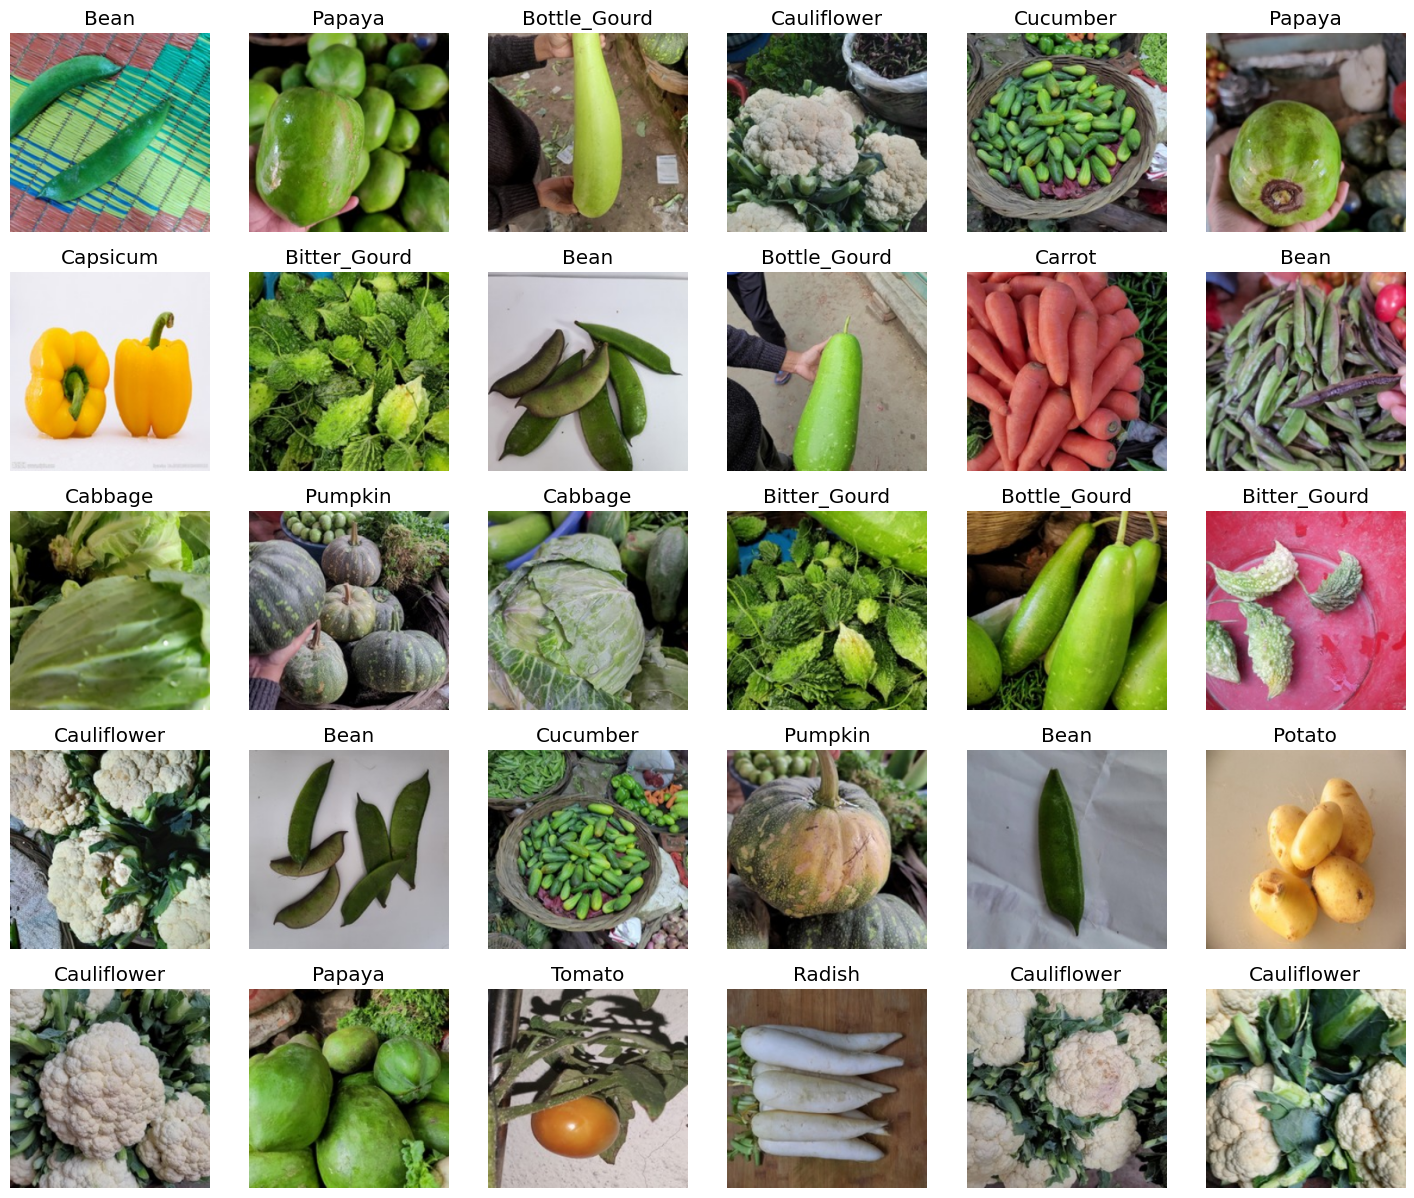

In [14]:
dls.show_batch(max_n=30, nrows=5)

In [15]:
from fastai.learner import *

In [16]:
learn = vision_learner(
    dls,
    resnet18,
    metrics=[accuracy]
).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 174MB/s]


In [17]:
learn.fine_tune(epochs=5,freeze_epochs=1)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.


epoch,train_loss,valid_loss,accuracy,time
0,0.101429,0.020568,0.994524,01:25


epoch,train_loss,valid_loss,accuracy,time
0,0.016703,0.006676,0.997381,01:25
1,0.010792,0.006742,0.997857,01:24
2,0.006278,0.005839,0.998333,01:24
3,0.000921,0.004069,0.998571,01:24
4,0.001426,0.003580,0.998810,01:25


In [18]:
interp = ClassificationInterpretation.from_learner(learn)

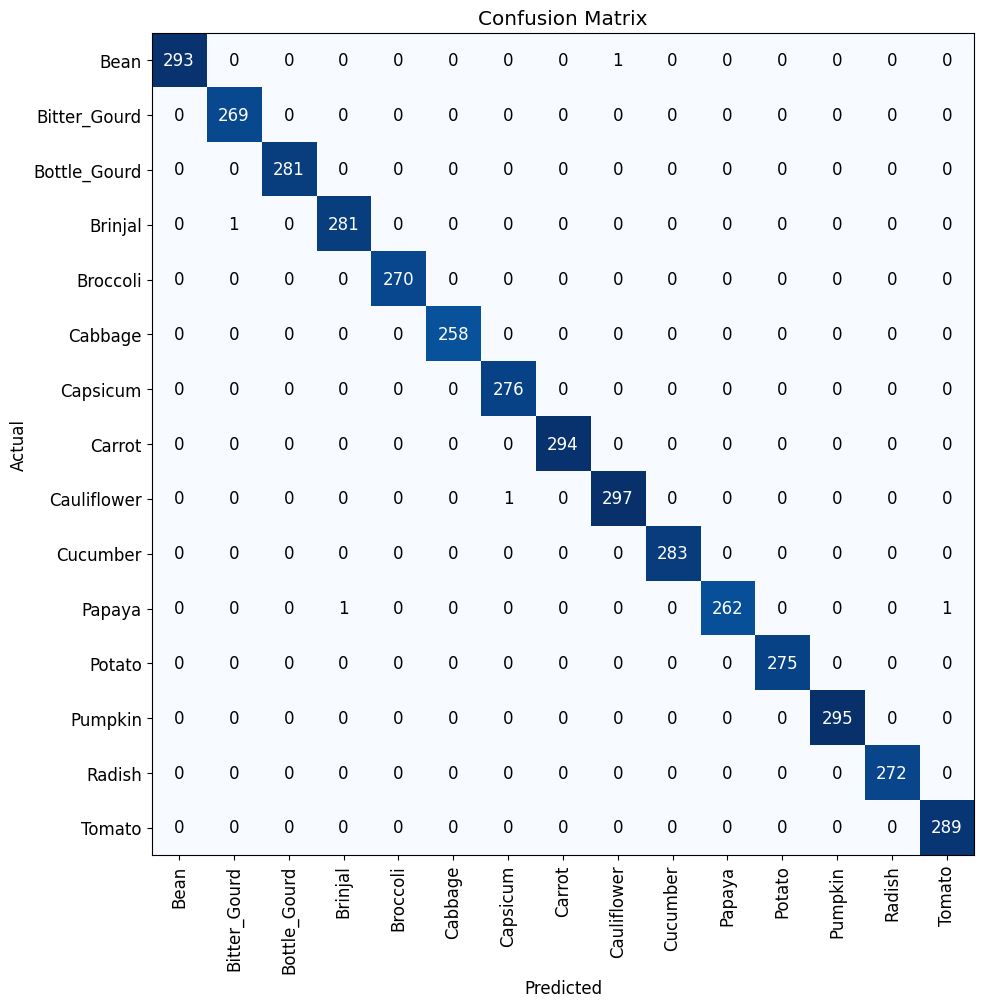

In [19]:
interp.plot_confusion_matrix(figsize=(10, 10), title="Confusion Matrix", normalize=False)

In [20]:
interp.print_classification_report()

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.


              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00       294
Bitter_Gourd       1.00      1.00      1.00       269
Bottle_Gourd       1.00      1.00      1.00       281
     Brinjal       1.00      1.00      1.00       282
    Broccoli       1.00      1.00      1.00       270
     Cabbage       1.00      1.00      1.00       258
    Capsicum       1.00      1.00      1.00       276
      Carrot       1.00      1.00      1.00       294
 Cauliflower       1.00      1.00      1.00       298
    Cucumber       1.00      1.00      1.00       283
      Papaya       1.00      0.99      1.00       264
      Potato       1.00      1.00      1.00       275
     Pumpkin       1.00      1.00      1.00       295
      Radish       1.00      1.00      1.00       272
      Tomato       1.00      1.00      1.00       289

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00   

In [21]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl') #

In [23]:
from PIL import Image
def predict(img):
    pred, pred_idx, pred_prob = learn_inf.predict(img)
    image = plt.imread(img)
    imgplot = plt.imshow(image)
    plt.show()
    print("Predict : ",pred, pred_prob[pred_idx])
    print("Actual : ",parent_label(img))
    print("-"*56)

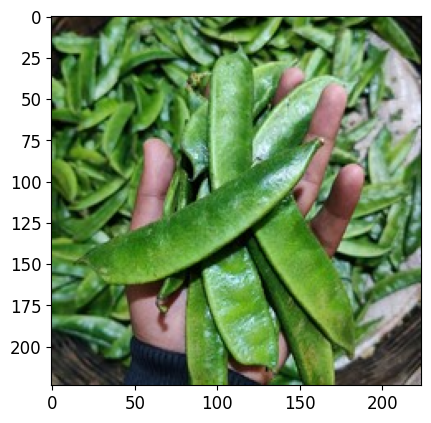

Predict :  Bean tensor(1.)
Actual :  Bean
--------------------------------------------------------


In [24]:
predict('/content/Vegetable Images/test/Bean/0001.jpg')